### Análise exploratória dos dados

# 1.0 IMPORTS

In [1]:
import matplotlib.pyplot as plt 

import numpy    as np
import pandas   as pd
import seaborn  as sns


## 1.1 Carregamento do Dataset

In [2]:
df = pd.read_csv('../dataset/train.csv')

In [3]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


# 2.0 Descrição dos dados

In [4]:
# cópia do dataset
df1 = df.copy()

In [21]:
# Renomeação das colunas
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 
            'vehicle_age', 'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']
            
df1.columns = cols_new            

In [22]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 2.1 Dimensão do Dataset

In [23]:
print(f'Quantidade de linhas: {df1.shape[0]}')
print(f'Quantidade de colunas: {df1.shape[1]}')

Quantidade de linhas: 381109
Quantidade de colunas: 12


## 2.2 Tipo dos dados

In [24]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 2.3 Check NAs

In [25]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 2.4 Dados descritivos

In [26]:
# Separação das colunas numéricas e categóricas
colunas_numericas = df1.select_dtypes( include=['int64','float64'] )
colunas_categoricas = df1.select_dtypes( exclude=[ 'int64', 'float64', 'datetime64[ns]' ] )

In [27]:
# Estatísticas descritivas para colunas numéricas
stats = colunas_numericas.agg([ 'min', 'max', lambda x: x.max() - x.min(), 'mean', 'median', 'std', 'skew', 'kurtosis'])

# Renomeação dos índices para manter o padrão nos nomes 
stats.index = ['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# Transformação para um DataFrame organizado
stats = stats.T.reset_index().rename(columns={ 'Index': 'Atributos'})

stats

,index,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046110,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229888,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203995,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327936,2.301906e+00,3.298788


# 3.0 Feature Engineering

In [28]:
df2 = df1.copy()

In [29]:
# Converte descrições da idade do veículo 
df2['vehicle_age'] = df2['vehicle_age'].apply(
    lambda x: 'mais_de_2_anos' if x == '> 2 Years' 
    else 'entre_1_e_2_anos' if x == '1-2 Year'
    else 'menos_de_1_ano' )

# Transfoma a variável categórica em binária
df2['vehicle_damage'] = df2['vehicle_damage'].apply(
    lambda x: 1 if 'Yes' else 0 )

# 4.0 Análise bivariada

In [30]:
df3 = df2.copy()

C:\Users\raile\AppData\Local\Temp\ipykernel_10136\2064713739.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='age', data=df3, ax=axes[0], palette= 'pastel')


Text(0.5, 1.0, 'Idades que responderam')

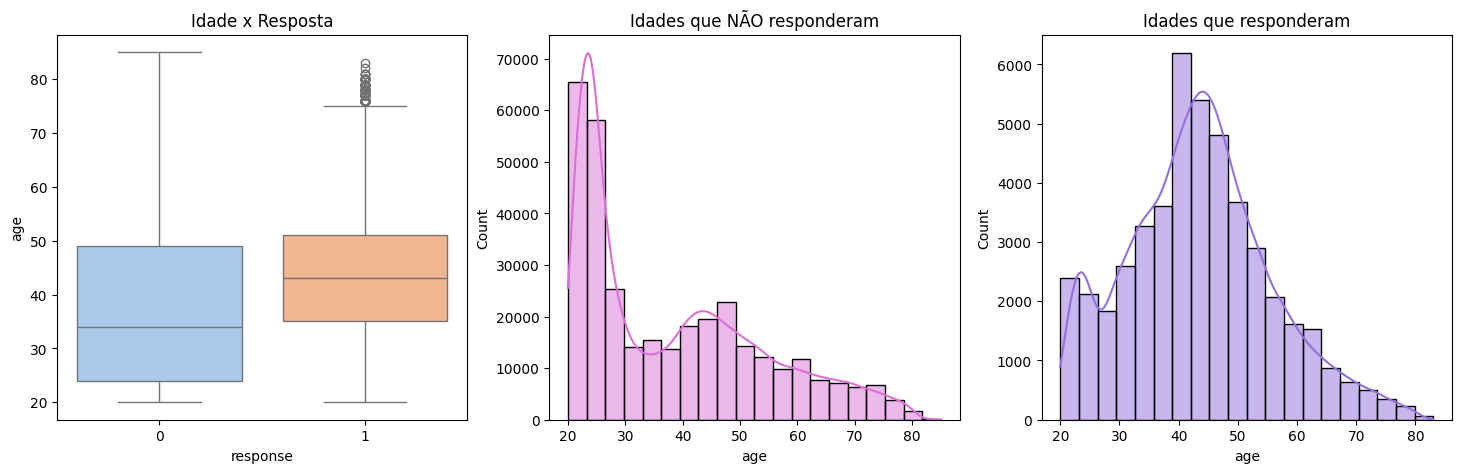

In [31]:
# Análise da coluna 'age'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot da idade por resposta
sns.boxplot(x='response', y='age', data=df3, ax=axes[0], palette= 'pastel')
axes[0].set_title("Idade x Resposta")

# Histograma das idades que NÃO responderam (response == 0)
age_no_response = df3.loc[df3['response'] == 0, 'age']
sns.histplot(age_no_response, bins=20, kde=True, ax=axes[1], color='orchid')
axes[1].set_title("Idades que NÃO responderam")

# Histograma das idades que responderam (response == 1)
ages_accepted_response = df3.loc[df3['response'] == 1, 'age']
sns.histplot(ages_accepted_response, bins=20, kde=True, ax=axes[2],color='mediumpurple')
axes[2].set_title("Idades que responderam")

C:\Users\raile\AppData\Local\Temp\ipykernel_10136\4027154673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'response', y='annual_premium', data=aux, ax=axes[0], palette='pastel')


Text(0.5, 1.0, 'Prêmio anual com resposta = 1')

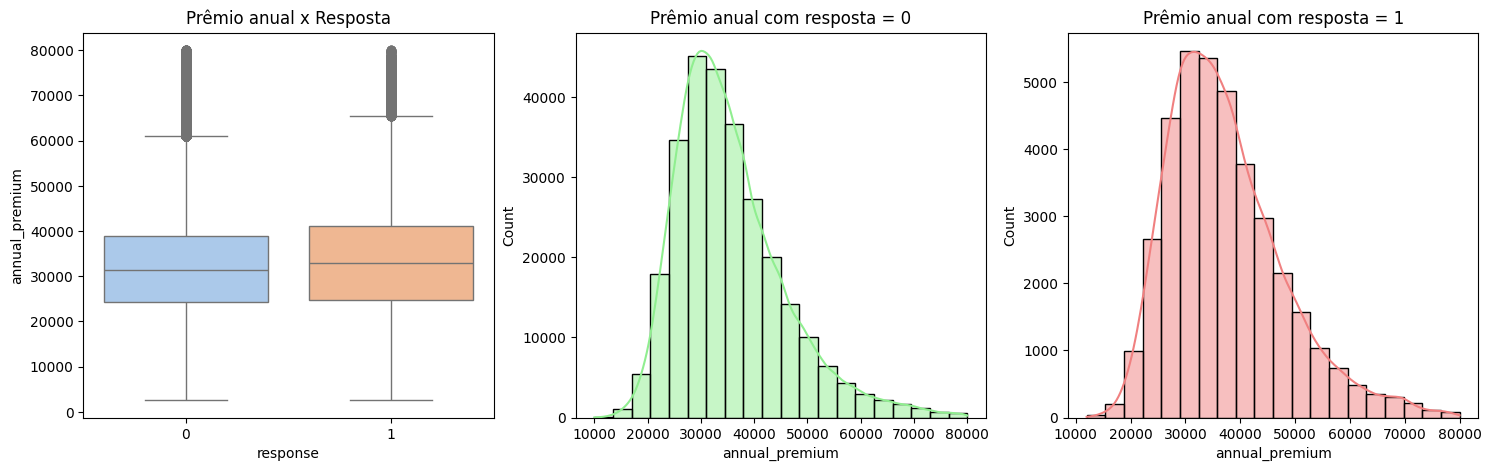

In [32]:
# Análise da coluna annual_premium
fig,axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot de annual premium por resposta
aux = df3[df3[ 'annual_premium' ] < 80000]
sns.boxplot(x = 'response', y='annual_premium', data=aux, ax=axes[0], palette='pastel')
axes[0].set_title("Prêmio anual x Resposta")

# Histograma de Annual Premium para Response = 0
aux1 = df3[(df3[ 'annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux2 = aux1.loc[aux1['response'] == 0, 'annual_premium']
sns.histplot(aux2, bins=20, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Prêmio anual com resposta = 0")

# Histograma de Annual Premium para Response = 1
aux2 = aux1.loc[aux1['response'] == 1, 'annual_premium']
sns.histplot(aux2, bins=20, kde=True, ax=axes[2], color='lightcoral')
axes[2].set_title("Prêmio anual com resposta = 1")

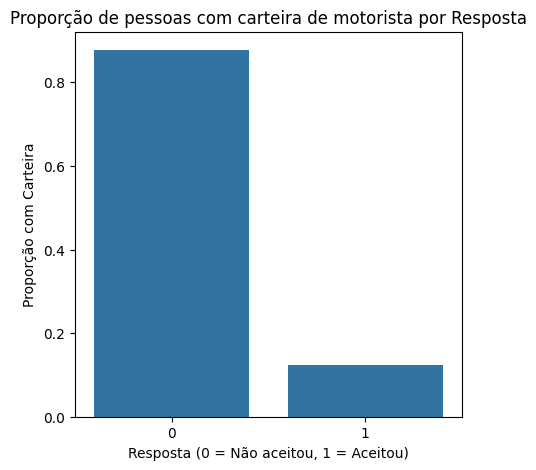

In [33]:
# Análise da coluna driving_license
# Agrupar por response e somar driving_license
aux = df3[['driving_license', 'response']].groupby('response').sum().reset_index()

# Cáculo de proporção
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()

# Gráfico de barras com proporções
plt.figure(figsize=(5, 5))
sns.barplot(x='response', y='driving_license_perc', data=aux)
plt.title("Proporção de pessoas com carteira de motorista por Resposta")
plt.xlabel("Resposta (0 = Não aceitou, 1 = Aceitou)")
plt.ylabel("Proporção com Carteira")
plt.show()

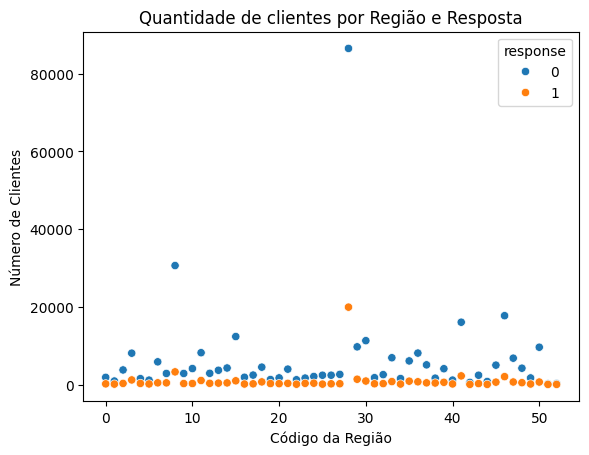

In [ ]:
# Análise da coluna region code
region_response_counts = df3[['id', 'region_code', 'response']].groupby(
    ['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=region_response_counts)
plt.title("Quantidade de clientes por Região e Resposta")
plt.xlabel("Código da Região")
plt.ylabel("Número de Clientes")
plt.show()

C:\Users\raile\AppData\Local\Temp\ipykernel_10136\86937309.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\raile\AppData\Local\Temp\ipykernel_10136\86937309.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Text(0, 0.5, 'Contagem')

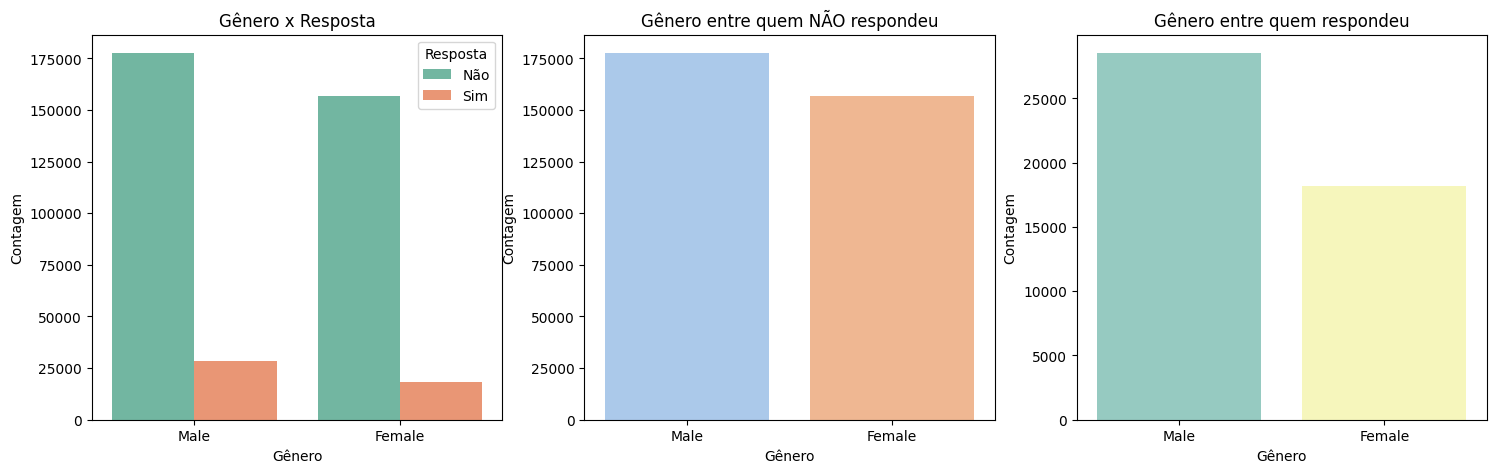

In [ ]:
# Análise da coluna gender
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CCountplot por distribuição de resposta por gênero
sns.countplot(
    x='gender', 
    hue='response', 
    data=df3, 
    palette='Set2', 
    ax=axes[0]
)
axes[0].set_title('Gênero x Resposta')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Contagem')
axes[0].legend(title='Resposta', labels=['Não', 'Sim'])

# Countplot por gênero entre os que NÃO responderam (response == 0)
gender_no_response = df3[df3['response'] == 0]['gender']
sns.countplot(
    x=gender_no_response, 
    palette='pastel', 
    ax=axes[1]
)
axes[1].set_title('Gênero entre quem NÃO respondeu')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Contagem')

# Countplot por gênero entre os que responderam (response == 1)
gender_yes_response = df3[df3['response'] == 1]['gender']
sns.countplot(
    x=gender_yes_response, 
    palette='Set3', 
    ax=axes[2]
)
axes[2].set_title('Gênero entre quem respondeu')
axes[2].set_xlabel('Gênero')
axes[2].set_ylabel('Contagem')

In [50]:
# Análise da coluna previously_insured
pd.crosstab(df3['previously_insured'],
            df3['response'], 
            rownames=['Já possuia seguro?'],
            colnames=['Aceitou proposta?'],
            normalize='index').style.format("{:.2%}")

Aceitou proposta?,0,1
Já possuia seguro?,,
0,77.45%,22.55%
1,99.91%,0.09%


In [51]:
# Análise da coluna 
(df3[['vehicle_age', 'response']]
 .value_counts(normalize=True)
 .reset_index()
)

,vehicle_age,response,proportion
0,entre_1_e_2_anos,0,0.434285
1,menos_de_1_ano,0,0.413488
2,entre_1_e_2_anos,1,0.091328
3,mais_de_2_anos,0,0.029663
4,menos_de_1_ano,1,0.018897
5,mais_de_2_anos,1,0.012338


C:\Users\raile\AppData\Local\Temp\ipykernel_8532\3241898975.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='response', y='policy_sales_channel', data=aux, palette='viridis' )


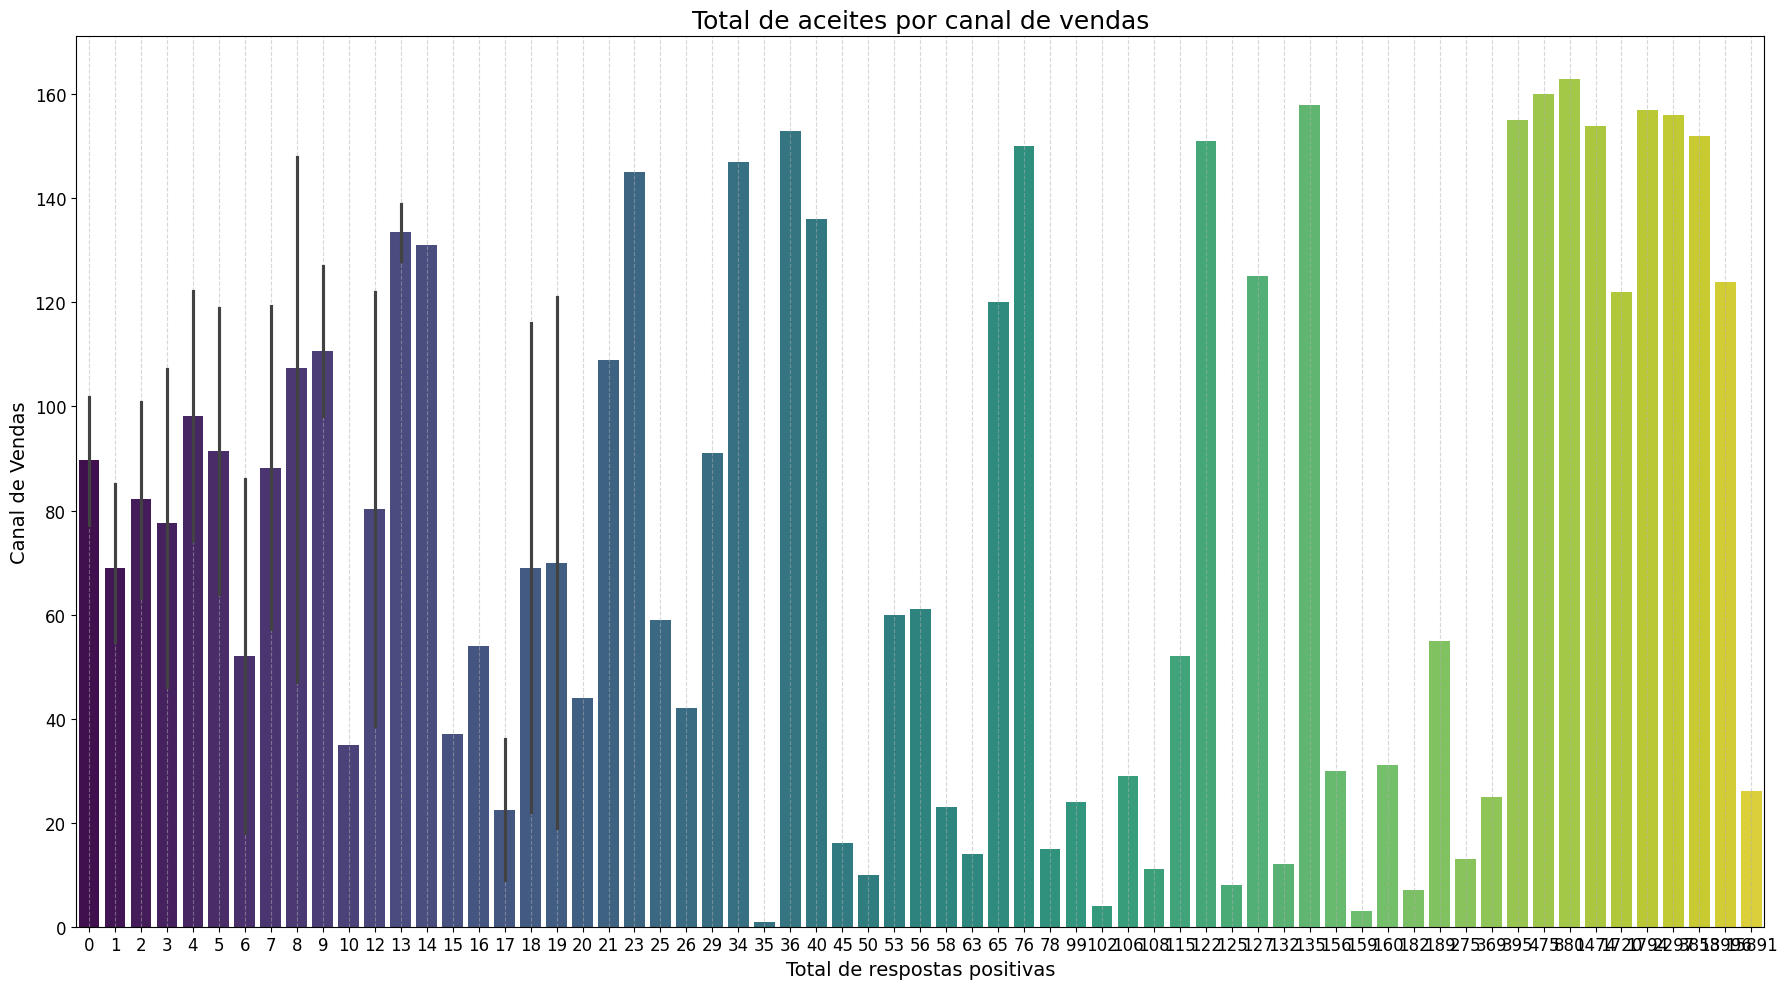

In [55]:
# Análise da variável policy_sales_channel
# Agrupamento: somar apenas os que aceitaram (response = 1)
aux = (
    df3[['policy_sales_channel', 'response']]
    .groupby('policy_sales_channel')
    .sum(numeric_only=True)
    .reset_index()
    .sort_values(by='response', ascending=False)
)
# Plot
plt.figure(figsize=(18, 10))  
sns.barplot(x='response', y='policy_sales_channel', data=aux, palette='viridis' )
plt.title('Total de aceites por canal de vendas', fontsize=18)
plt.xlabel('Total de respostas positivas', fontsize=14)
plt.ylabel('Canal de Vendas', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\raile\AppData\Local\Temp\ipykernel_8532\3606155486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='vintage', data=df3, ax=axes[0], palette='pastel')


Text(0, 0.5, 'Frequência')

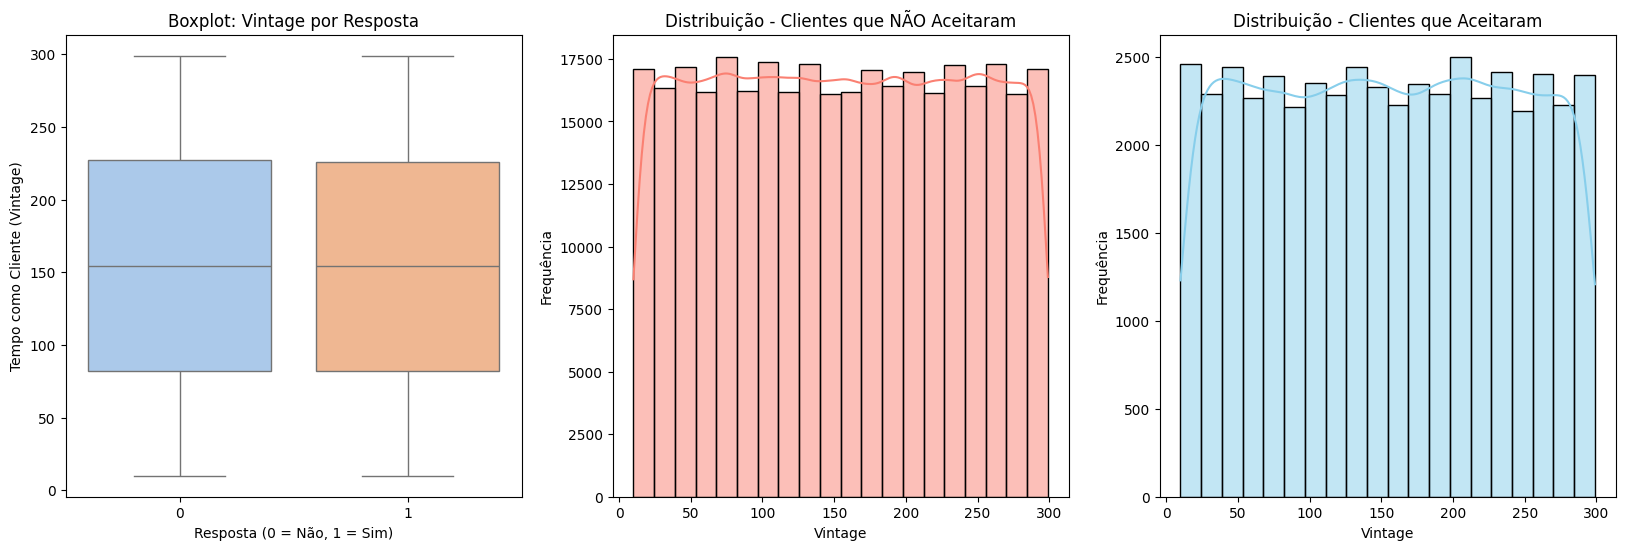

In [67]:
# Análise da variável vintage
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Boxplot distribuição de vintage por resposta
sns.boxplot(x='response', y='vintage', data=df3, ax=axes[0], palette='pastel')
axes[0].set_title("Boxplot: Vintage por Resposta")
axes[0].set_xlabel("Resposta (0 = Não, 1 = Sim)")
axes[0].set_ylabel("Tempo como Cliente (Vintage)")

# Histograma clientes que NÃO aceitaram
vintage_nao_aceitou = df3.loc[df3['response'] == 0, 'vintage']
sns.histplot(vintage_nao_aceitou, bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribuição - Clientes que NÃO Aceitaram")
axes[1].set_xlabel("Vintage")
axes[1].set_ylabel("Frequência")

# Histograma clientes que aceitaram
vintage_aceitou = df3.loc[df3['response'] == 1, 'vintage']
sns.histplot(vintage_aceitou, bins=20, kde=True, ax=axes[2], color='skyblue')
axes[2].set_title("Distribuição - Clientes que Aceitaram")
axes[2].set_xlabel("Vintage")
axes[2].set_ylabel("Frequência")
